Engi 9981 Guidance Navigation and Control


# Mathematical Preliminaries

This topics reviews the mathematical background and introduces the notations used in these notes.


## Vectors & Frames

* A vector $\mathbf{p}\in \mathbb{R}^3$ is a mathematical object that can be used to represent a magnitude given by $||\mathbf{p}||$ and a 3 dimensional direction given by $\vec{\mathbf{p}}=\mathbf{p}/||\mathbf{p}||$, where operator $||\cdot||$ is the norm of a vector and unit vectors are denoted using $\vec{\cdot}$ notation.
* Vectors can be used to represent different physical quantities. e.g., position $\mathbf{p}$, velocity $\mathbf{v}$, angular velocity $\boldsymbol{\omega}$ are typically denoted using 3 dimensional column vectors.
* We can denote the position of point $b$ relative to point $a$ using subscripts of a position vector $\mathbf{p}_{ab}$. Similarly, we can denote the velocity of point $b$ relative to point $a$ using subscripts of a velocity vector $\mathbf{v}_{ab}$.


* Scalar multiplication of a vector scales the magnitude of the vector, where 
\begin{equation}
\begin{array}{c}
||s\mathbf{p}||=s||\mathbf{p}|| \\
\vec{s\mathbf{p}}=\vec{\mathbf{p}}
\end{array}
\end{equation}.

* Addition of the vectors follow the triangle rule, where 
\begin{equation}
\mathbf{p}_{ac}=\mathbf{p}_{ab}+\mathbf{p}_{bc}
\end{equation}.

* The projected length of vector $\mathbf{a}$ in the direction of vector $\mathbf{b}$ is given by the dot product $\mathbf{a}^T\vec{\mathbf{b}}$. The dot product is defined as follows where $\theta$ is the angle between the two vectors.

\begin{equation}
\mathbf{a}^T\mathbf{b}=||\mathbf{a}|||\mathbf{b}||cos\theta
\end{equation}.

* The cross product between the same two vectors produces a vector perpendicular to $\mathbf{a}$ and $\mathbf{b}$ having a length of $||\mathbf{a}||||\mathbf{b}||sin\theta$. The cross product is defined as follows where $\vec{\mathbf{n}}$ is the normal vector direction $\vec{\mathbf{a}}\times \vec{\mathbf{b}}$.

\begin{equation}
\mathbf{a}\times \mathbf{b}=||\mathbf{a}|||\mathbf{b}||sin\theta~ \vec{\mathbf{n}}
\end{equation},


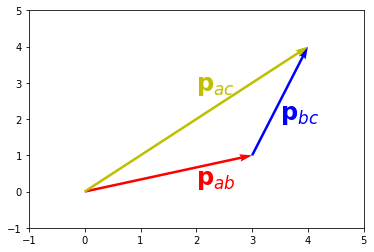

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[3,1],[1,3],[4,4]]) # vectors
origin = [0,3,0], [0,1,0] # origin point
ax =plt.gca()
ax.set_xlim([-1,5])
ax.set_ylim([-1,5])
plt.quiver(*origin, V[:,0], V[:,1],angles='xy',scale_units='xy', color=['r','b','y'], scale=1)

plt.text(2.0,0.2,r'$\mathbf{p}_{ab}$',fontsize=24,color='r')
plt.text(3.5,2.0,r'$\mathbf{p}_{bc}$',fontsize=24,color='b')
plt.text(2.0,2.8,r'$\mathbf{p}_{ac}$',fontsize=24,color='y')
plt.draw()
plt.show()



* Three perpendicular unit vectors $\vec{\mathbf{x}},\vec{\mathbf{y}},\vec{\mathbf{z}}$ arranged in a right handed coordinate system, i.e.,  $\vec{\mathbf{x}}\times\vec{\mathbf{y}}=\vec{\mathbf{z}}$ defines a coordinate frame.
* A coordinate frame labeled W is defined using notation $\{W\}$ and can be identified as objects of group $\mathbb{SE(3)}$.
* The pose between two reference frames $\{W\}$ and $\{B\}$ can be represented using a position vector $^w\mathbf{p}_{wb}\in R^3$ and a rotation matrix $^w\mathbf{R}_b\in\mathbb{SO(3)}$.

* The vector $^w\mathbf{p}_{wb}$ should be read as the location of $\{B\}$ relative to $\{W\}$ expressed in frame $\{W\}$. The vector represents the location of the origin of $\{B\}$  relative to origin of $\{W\}$ when measured along the principal axis of $\{W\}$ .

* The rotation matrix  $^w\mathbf{R}_b$ should be read as the orientation of frame $\{B\}$ expressed in $\{W\}$. Rotation matrices have several unique properties. 


## Rotation matrices 


1. The rotation matrix $^w\mathbf{R}_b$ allows to rotate vectors from frame $\{B\}$  to frame $\{W\}$. i.e. given a vector $\textbf{p}_{wb}^b$  expressed in frame $\{B\}$, we can find the vector $\mathbf{p}_{wb}^w$ as follows:

\begin{equation}
^w\mathbf{p}_{wb}= ~^w\mathbf{R}_b ~^b\mathbf{p}_{wb}
\end{equation}

2. For three dimensional rotations, rotation matrices have a dimension of $3 \times 3$.

3. Matrix inverse of a rotation matrix ${\mathbf{R}_o^w}^{-1}$ is equal to $\mathbf{R}_w^o$ ,i.e., denotes the rotation of a follower frame $\{W\}$ w.r.t. a base frame $\{O\}$.

4. Rotation matrices are orthogonal.
\begin{equation}
{\mathbf{R}_o^w}^T={\mathbf{R}_o^w}^{-1}
\end{equation}

5. Right-hand rule can be used to find the positive direction of rotation. i.e., CCW rotation about an axis is positive.

6. Rotations about the principal axis' follows a predictable pattern.

\begin{equation}
\begin{array}{c c}
Rot(x, \psi)=\begin{bmatrix} 1 & 0 &0\\ 0  &  \cos \psi  &-\sin \psi\\ 0 &\sin \psi  &\cos \psi \end{bmatrix}&
Rot(y, \theta)=\begin{bmatrix} \cos \theta &0 & \sin \theta \\ 0 &1 &0\\-\sin \theta &0 &  \cos \theta \end{bmatrix}\\
Rot(z, \phi)=\begin{bmatrix} \cos \phi &- \sin \phi &0\\ \sin \phi  &  \cos \phi &0\\ 0 &0 &1 \end{bmatrix} \\              
\end{array}
\end{equation}

7. Rotations can be combined by matrix multiplication and the rotation sequence depends on the order in which they are applied. 


### Exercise  1
Write a function to return the rotation matrix corresponding to a rotation about an principal axis (x,y, or z) and an angle specified by the user. Use the function to find the rotation matrix corresponding to a rotation of $\pi/3$ about the z axis.

In [1]:
import sympy
import numpy as np

def rotsym(a,b):
    c=sympy.cos(b)
    s=sympy.sin(b)
    if a=="z":
        R = sympy.Matrix([[c,-s,0],
        [s,c,0],
        [0,0,1]])
    if a=="x":
        R = sympy.Matrix([[1,0,0],
        [0,c,-s],
        [0,s,c]])
    if a=="y":
        R = sympy.Matrix([[c,0,s],
        [0,1,0],
        [-s,0,c]])
    return(R)

#test the function
R = rotsym('z',sympy.pi/3)
R

Matrix([
[      1/2, -sqrt(3)/2, 0],
[sqrt(3)/2,        1/2, 0],
[        0,          0, 1]])

### Exercise 2
Roll $(\phi)$, pitch$(\theta)$, yaw$(\psi)$ axis convention  is commonly used to parameterize 3D rotations using 3 angles (also known as ZYX Euler angles). This corresponds to the following sequence of rotations starting at a base frame $\{W\}$  ending on a follower frame $\{O\}$. Rotate $\psi$ about z axis of frame $\{W\}$ to reach frame $\{O_1\}$, then rotate $\theta$ about y axis of frame $\{O_1\}$ to reach frame $\{O_2\}$, then rotate $\phi$ about x axis of frame $\{O_2\}$ to reach frame $\{O\}$. 

<img src="img/rpy.png" width="200" height="200" /> 
<div style="text-align: center">![rpy](./img/rpy.png){width=200px}</div>

The following code evaluates the answer using the *rotsym* function.


In [2]:
θ = sympy.Symbol('θ')
ϕ = sympy.Symbol('ϕ')
ψ = sympy.Symbol('ψ')
R=rotsym("z",ψ)*rotsym("y",θ)*rotsym("x",ϕ)
R

Matrix([
[cos(θ)*cos(ψ), sin(θ)*sin(ϕ)*cos(ψ) - sin(ψ)*cos(ϕ), sin(θ)*cos(ψ)*cos(ϕ) + sin(ψ)*sin(ϕ)],
[sin(ψ)*cos(θ), sin(θ)*sin(ψ)*sin(ϕ) + cos(ψ)*cos(ϕ), sin(θ)*sin(ψ)*cos(ϕ) - sin(ϕ)*cos(ψ)],
[      -sin(θ),                        sin(ϕ)*cos(θ),                        cos(θ)*cos(ϕ)]])

We can visualize the frames using the following methods:

In [3]:
%run topic_1_funcs.py


In [1]:
import ipywidgets as widget

figure2=p3.figure()      #define new figure
figure2.animation = 0    # disable interpolation
p3.clear()               # clear any content
handle=init_vector(show=True) #initialize a frame this can be called to initialize new frame, show displays the figure in this cell or the previous instanc gets updated

def dash1(roll,pitch,yaw):
    p = np.array([0.0,0.0,0.0])
    R= Rot.from_euler('xyz', [roll,pitch,yaw], degrees=True)
    ipv_setframe(p,R,handle)  #this function updates the frame

i=widget.interact(dash1,roll=widget.FloatSlider(min=0, max=60, step=1),pitch=widget.FloatSlider(min=0, max=60, step=1),yaw=widget.FloatSlider(min=0, max=60, step=1))

NameError: name 'p3' is not defined

### Exercise 3

Show that $\mathbf{R}_{a(t+\delta t)}^{a(t)}=\mathbf{I}+\boldsymbol{\delta\theta}_{\times}$, where $\boldsymbol{\delta\theta}=(\delta\theta_x,~\delta\theta_y,~\delta\theta_z)^T$ denotes infinitesimal rotations about $x,~y$ and $z$ axis which occurs during $\delta t$.

<img src="img/eqn2.png" width="500" /> 
<div style="text-align: center">![eqn2](./img/eqn2.png){width=500px}</div>

### Exercise 4
Show that $\dot{\mathbf{R}}_b^a=\mathbf{R}_b^a\mathbf{\Omega}_{ab}^b$

<img src="img/eqn3.png" width="500" /> 
<div style="text-align: center">![eqn3](./img/eqn3.png){width=500px}</div>

## Useful Vector Matrix Identities
The following is a summary of relationships related to vectors and matrix differentiation which are important in the development that follows:

Expressing vector in a different frame
\begin{equation}
\begin{array}{c l}
\mathbf{p}^a_{ab} &= \mathbf{R}^a_b\mathbf{p}^b_{ab}\\
\end{array}
\end{equation}

Vector addition
\begin{equation}
\begin{array}{c l}
\mathbf{p}^a_{ac} &=\mathbf{p}^a_{ab}+\mathbf{p}^a_{bc}\\
&=\mathbf{p}^a_{ab}+\mathbf{R}^a_b\mathbf{p}^b_{bc}\\
\end{array}
\end{equation}

Vector substraction
\begin{equation}
\begin{array}{c l}
\mathbf{p}^a_{ab} &= - \mathbf{p}^a_{ba} = -\mathbf{R}^a_b\mathbf{p}^b_{ba}\\
\end{array}
\end{equation}

Skew symmetric representation
\begin{equation}
\boldsymbol{\omega} \times \mathbf{r} = [\boldsymbol{\omega}]_{\times}\mathbf{r} = -[\mathbf{r}]_{\times}\boldsymbol{\omega}
\end{equation}

Rotation kinematics
\begin{equation}
\dot{\mathbf{R}_b^w} = ~\mathbf{R}_b^w[\boldsymbol{\omega}_{wb}^b]_{\times} 
\end{equation}

Expressing angular velocity tensor in a different frame:
\begin{equation}
\boldsymbol{\Omega}^w_{wb}= \mathbf{R}^w_b\boldsymbol{\Omega}^b_{wb}{\mathbf{R}^w_b}^T
\end{equation}

Matrix inversion/ transpose lemma
\begin{equation}
{\boldsymbol{\Omega}^w_{wb}}^T= ({\mathbf{R}^w_b\boldsymbol{\Omega}^b_{wb}{\mathbf{R}^b_w}})^T = {\mathbf{R}^b_w}^T{\boldsymbol{\Omega}^b_{wb}}^T{\mathbf{R}^w_b}^T  = {\mathbf{R}^w_b}{\boldsymbol{\Omega}^b_{bw}}{\mathbf{R}^b_w}  =\boldsymbol{\Omega}^w_{bw}
\end{equation}



### Exercise 5
Derive the Euler equation of motion for a rigid body with Inertia $\mathbf{I}^b$ expressed in body fixed frame $\{B\}$.

\begin{equation*}
\boldsymbol{\Gamma}^b_{ib}= \mathbf{I}^b \boldsymbol{\alpha}_{ib}^b+\boldsymbol{\omega}_{ib}^b\times  \mathbf{I}^b\boldsymbol{\omega}_{ib}^b
\end{equation*}


<img src="img/eqn1.png" width="500" /> 
<div style="text-align: center">![eqn1](./img/eqn1.png){width=500px}</div>
